# [作業目標]
- 對資料做更多處理 : 顯示特定欄位的統計值與直方圖

# [作業重點]
- 試著顯示特定欄位的基礎統計數值 (In[4], Out[4], Hint : describe())
- 試著顯示特定欄位的直方圖 (In[5], Out[5], Hint : .hist())

In [4]:
# Import 需要的套件
import os
import numpy as np
import pandas as pd

# 設定 data_path
dir_data = './data/'

In [5]:
f_app_train = os.path.join(dir_data, 'application_train.csv')
app_train = pd.read_csv(f_app_train)

In [6]:
import matplotlib.pyplot as plt
%matplotlib inline

## 練習時間

觀察有興趣的欄位的資料分佈，並嘗試找出有趣的訊息
#### Eg
- 計算任意欄位的平均數及標準差
- 畫出任意欄位的[直方圖](https://zh.wikipedia.org/zh-tw/%E7%9B%B4%E6%96%B9%E5%9B%BE)

### Hints:
- [Descriptive Statistics For pandas Dataframe](https://chrisalbon.com/python/data_wrangling/pandas_dataframe_descriptive_stats/)
- [pandas 中的繪圖函數](https://amaozhao.gitbooks.io/pandas-notebook/content/pandas%E4%B8%AD%E7%9A%84%E7%BB%98%E5%9B%BE%E5%87%BD%E6%95%B0.html)


In [7]:
print(app_train.shape)
print(app_train.head())

(307511, 122)
   SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   

   ...  FLAG_DOCUMENT_18 FLAG_DOCUMENT_19 FLAG_DOCUMENT_20 FLAG_DOCUMENT_21  \
0  ...                 

In [8]:
app_train.dtypes

SK_ID_CURR                      int64
TARGET                          int64
NAME_CONTRACT_TYPE             object
CODE_GENDER                    object
FLAG_OWN_CAR                   object
                               ...   
AMT_REQ_CREDIT_BUREAU_DAY     float64
AMT_REQ_CREDIT_BUREAU_WEEK    float64
AMT_REQ_CREDIT_BUREAU_MON     float64
AMT_REQ_CREDIT_BUREAU_QRT     float64
AMT_REQ_CREDIT_BUREAU_YEAR    float64
Length: 122, dtype: object

#### 計算任意欄位的平均數及標準差

In [9]:
# 平均數
print(app_train['AMT_INCOME_TOTAL'].mean())

# 標準差
print(app_train['AMT_INCOME_TOTAL'].std())

168797.9192969845
237123.14627883647


In [10]:
# 計算客戶收入最大值與最小值
print(app_train['AMT_INCOME_TOTAL'].max())
print(app_train['AMT_INCOME_TOTAL'].min())

117000000.0
25650.0


In [11]:
# 確認取出資料型態
type(app_train['AMT_INCOME_TOTAL'])

pandas.core.series.Series

In [12]:
# 客戶收入資料偏態分布
print('偏態係數: ',app_train['AMT_INCOME_TOTAL'].skew()) #>0 右偏分配 
print('峰態係數: ',app_train['AMT_INCOME_TOTAL'].kurt()) #>0 高峽峰

偏態係數:  391.5596541041876
峰態係數:  191786.55438080415


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001A8D8AFDE88>]],
      dtype=object)

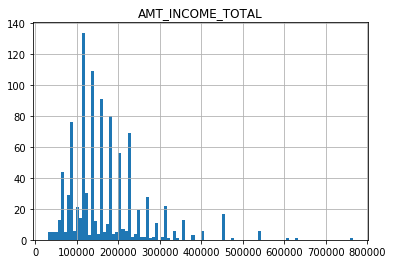

In [16]:
app_train.head(1000).hist(column="AMT_INCOME_TOTAL",bins=100)

In [13]:
#處理異常值，去除3個標準差以外的數值
income = app_train['AMT_INCOME_TOTAL']
mean = income.mean()
standard_deviation = income.std()
aft_income = income[np.abs(income-mean)<=3*standard_deviation]

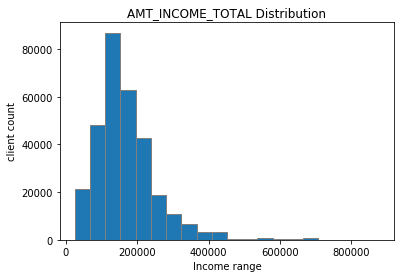

In [14]:
# bins:長條圖區間數目
plt.hist(aft_income,bins=20,edgecolor='gray') 
plt.xlabel('Income range')
plt.ylabel('client count')
plt.title('AMT_INCOME_TOTAL Distribution')
plt.show()

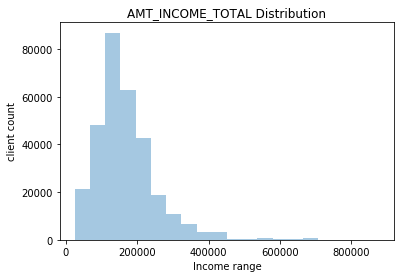

In [15]:
# 用seaborn繪圖
import seaborn as sns
sns.distplot(aft_income, kde=False, bins=20)
plt.xlabel('Income range')
plt.ylabel('client count')
plt.title('AMT_INCOME_TOTAL Distribution')
plt.show()